In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;
import math;
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("SFlow_Data_1.csv", names = ['Type', 'sflow_agent_address','inputPort','outputPort','src_MAC','dst_MAC','ethernet_type','in_vlan','out_vlan','src_IP','dst_IP','IP_protocol','ip_tos','ip_ttl','src_port_addr','dest_port_addr','tcp_flags','packet_size','IP_size','sampling_rate','isCNTR'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69370 entries, 0 to 69369
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 69370 non-null  object 
 1   sflow_agent_address  69370 non-null  object 
 2   inputPort            69370 non-null  int64  
 3   outputPort           69370 non-null  int64  
 4   src_MAC              69370 non-null  object 
 5   dst_MAC              69370 non-null  object 
 6   ethernet_type        69370 non-null  object 
 7   in_vlan              69370 non-null  float64
 8   out_vlan             69370 non-null  int64  
 9   src_IP               69370 non-null  object 
 10  dst_IP               69370 non-null  object 
 11  IP_protocol          69370 non-null  int64  
 12  ip_tos               69370 non-null  object 
 13  ip_ttl               69370 non-null  int64  
 14  src_port_addr        69370 non-null  float64
 15  dest_port_addr       69370 non-null 

In [3]:
df.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_port_addr,dest_port_addr,tcp_flags,packet_size,IP_size,sampling_rate,isCNTR
0,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.22,140.115.32.81,6,0x00,50,51216.0,23505,0x10,1518,1500,2048,NaN
1,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048,NaN
2,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048,NaN
3,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048,NaN
4,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048,NaN


In [4]:
df1 = df['src_IP'].value_counts().iloc[:10].rename_axis('val').reset_index(name='count')
df1

,val,count
0,193.62.192.8,3041
1,155.69.160.32,2975
2,130.14.250.11,2604
3,14.139.196.58,2452
4,140.112.8.139,2056
5,202.21.159.244,2053
6,137.132.228.15,1910
7,140.90.101.61,1561
8,193.62.192.6,1351
9,130.14.250.13,1242


In [5]:
df2 = df['dst_IP'].value_counts().iloc[:10].rename_axis('val').reset_index(name='count')
df2

,val,count
0,103.37.198.100,3841
1,137.132.228.15,3715
2,202.21.159.244,2446
3,192.101.107.153,2368
4,103.21.126.2,2056
5,193.62.192.8,1910
6,167.205.52.8,1561
7,140.115.32.81,1398
8,202.6.241.101,1355
9,203.30.39.13,1017


In [6]:
df3 = df['IP_protocol'].value_counts().rename_axis('protocol').reset_index(name='count')
df3['percent'] = df3['count']/df3['count'].sum()
df3

,protocol,count,percent
0,6,56064,0.808188
1,17,9462,0.136399
2,50,1698,0.024477
3,0,1261,0.018178
4,47,657,0.009471
5,41,104,0.001499
6,1,74,0.001067
7,381,45,0.000649
8,58,4,0.000058
9,103,1,0.000014


In [7]:
print(df3['count'].sum())

69370


In [8]:
df4 = df['dest_port_addr'].value_counts().rename_axis('port').reset_index(name = 'count')
df4

,port,count
0,443,13423
1,80,2647
2,52866,2068
3,45512,1356
4,56152,1341
...,...,...
7674,1240117,1
7675,3766453934,1
7676,55801,1
7677,588773243,1


In [9]:
totalsize = df['IP_size'].sum()
print(totalsize)

64777822


Additional analysis
- top 5 communication pair bar chart

In [10]:
df1 = df.loc[df['Type'] != 'CNTR']
dfpairs = df1[['src_IP', 'dst_IP', 'IP_protocol','IP_size']]
dfpairs

,src_IP,dst_IP,IP_protocol,IP_size
0,130.246.176.22,140.115.32.81,6,1500
1,155.69.160.32,64.233.188.128,6,52
2,130.246.176.53,140.115.32.83,6,1500
3,155.69.160.32,54.169.174.79,17,94
4,137.132.228.15,193.62.192.8,6,52
...,...,...,...,...
69365,207.241.228.157,210.48.222.9,6,1500
69366,192.122.131.36,216.58.203.234,6,1420
69367,137.132.228.15,193.62.192.8,6,64
69368,155.69.196.9,74.125.56.6,17,1245


In [42]:
dfpairs.loc[(dfpairs['src_IP'] == '193.62.192.8') & (dfpairs['dst_IP'] != '137.132.228.15')]

,src_IP,dst_IP,IP_protocol,IP_size


In [11]:
dfpairs2 = pd.DataFrame(columns = ['pair', 'count','size'])
dfpairs2['count'].astype('int64')
dfpairs2['size'].astype('int64')
i = 0;
for index, row in dfpairs.iterrows():
    rowset = {row['src_IP'], row['dst_IP']}
    if len(dfpairs2.index[dfpairs2['pair']== rowset].tolist()) == 0:
        dfpairs2.loc[i] = [rowset, 1, row['IP_size']]
        i+= 1;
    else:
        dfindex = dfpairs2.index[dfpairs2['pair']== rowset].tolist()[0]
        dfpairs2.at[dfindex,'count'] = dfpairs2.loc[dfindex]['count'] +1
        dfpairs2.at[dfindex,'size'] = dfpairs2.loc[dfindex]['size'] + row['IP_size']
        
#dfpairs2.loc[0] = [{1,2}, 1,1]
dfpairs2

,pair,count,size
0,"{140.115.32.81, 130.246.176.22}",81,121500
1,"{155.69.160.32, 64.233.188.128}",348,354469
2,"{140.115.32.83, 130.246.176.53}",20,30000
3,"{155.69.160.32, 54.169.174.79}",61,16726
4,"{193.62.192.8, 137.132.228.15}",4951,4342580
...,...,...,...
4995,"{155.69.195.46, 54.251.157.211}",1,48
4996,"{123.136.68.200, 143.225.150.122}",1,1300
4997,"{14.139.121.232, 49.140.80.7}",1,74
4998,"{192.122.131.36, 119.161.11.10}",1,41


In [12]:
dfp2s = dfpairs2.sort_values(by='count', ascending=False)
dfp2s

,pair,count,size
4,"{193.62.192.8, 137.132.228.15}",4951,4342580
139,"{130.14.250.11, 103.37.198.100}",2842,3911148
36,"{192.101.107.153, 14.139.196.58}",2368,94730
1184,"{103.21.126.2, 140.112.8.139}",2056,3084000
1653,"{140.90.101.61, 167.205.52.8}",1752,2222930
...,...,...,...
2758,"{172.217.27.3, 155.69.130.111}",1,81
2759,"{137.132.233.96, 52.193.29.61}",1,52
1039,"{74.125.200.155, 155.69.195.153}",1,98
2761,"{133.2.38.212, 14.139.110.93}",1,40


In [13]:
top5pairs = pd.DataFrame({'pair': ['{137.132.228.15, 193.62.192.8}', '{130.14.250.11, 103.37.198.100}', '{192.101.107.153, 14.139.196.58}', '{140.112.8.139, 103.21.126.2}', '{140.90.101.61, 167.205.52.8}' ] , 'count': [4951,2842,2368,2056,1752], 'size': [4342580,3911148,94730, 3084000, 2222930]})
top5pairs['percent'] = top5pairs['count']/(dfp2s['count'].sum())
top5pairs

,pair,count,size,percent
0,"{137.132.228.15, 193.62.192.8}",4951,4342580,0.072739
1,"{130.14.250.11, 103.37.198.100}",2842,3911148,0.041754
2,"{192.101.107.153, 14.139.196.58}",2368,94730,0.034790
3,"{140.112.8.139, 103.21.126.2}",2056,3084000,0.030206
4,"{140.90.101.61, 167.205.52.8}",1752,2222930,0.025740


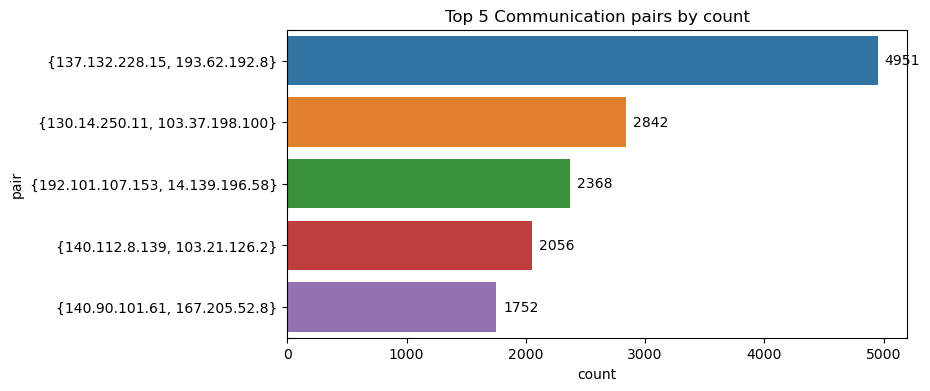

In [14]:
plt.figure(figsize = (8,4))
plt.title("Top 5 Communication pairs by count")
ax = sb.barplot(data = top5pairs,  y = 'pair', x = 'count', orient = "h")
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

In [15]:
dfp2size = dfpairs2.sort_values(by='size', ascending=False)
dfp2size

,pair,count,size
4,"{193.62.192.8, 137.132.228.15}",4951,4342580
139,"{130.14.250.11, 103.37.198.100}",2842,3911148
1184,"{103.21.126.2, 140.112.8.139}",2056,3084000
1653,"{140.90.101.61, 167.205.52.8}",1752,2222930
9,"{202.6.241.101, 193.62.192.6}",1385,2017986
...,...,...,...
1693,"{192.172.226.137, 192.248.21.209}",1,30
1904,"{14.139.213.38, 130.158.6.112}",1,29
1387,"{143.167.1.220, 192.122.131.33}",1,29
1424,"{130.158.6.110, 14.139.61.129}",1,29


In [16]:
top5size = pd.DataFrame({'pair': ['{137.132.228.15, 193.62.192.8}', '{130.14.250.11, 103.37.198.100}', '{140.112.8.139, 103.21.126.2}', '{140.90.101.61, 167.205.52.8}', '{193.62.192.6, 202.6.241.101}' ] , 'count': [4951,2842,2056,1752,1385], 'size': [4342580,3911148,3084000, 2222930, 2017986]})
top5size['percent'] = top5size['size']/totalsize
top5size

,pair,count,size,percent
0,"{137.132.228.15, 193.62.192.8}",4951,4342580,0.067038
1,"{130.14.250.11, 103.37.198.100}",2842,3911148,0.060378
2,"{140.112.8.139, 103.21.126.2}",2056,3084000,0.047609
3,"{140.90.101.61, 167.205.52.8}",1752,2222930,0.034316
4,"{193.62.192.6, 202.6.241.101}",1385,2017986,0.031152


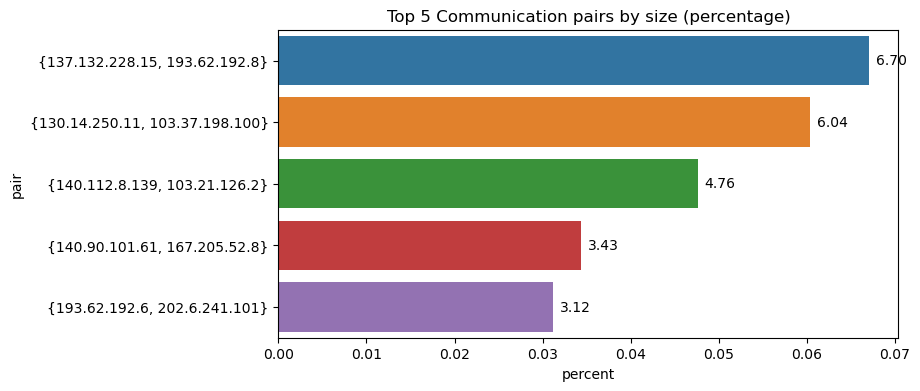

In [17]:
plt.figure(figsize = (8,4))
plt.title("Top 5 Communication pairs by size (percentage)")
ax = sb.barplot(data = top5size,  y = 'pair', x = 'percent', orient = "h")
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value*100)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.